# Statistical Data Analysis

The purpose of this project is to answer the following questions...
1. Are there NBA players making less or more than average salary?
2. What's the correlation of NBA players' salary and age?


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy.stats as st
from numpy.random import seed
import seaborn as sns
from scipy.stats import norm

df_final = pd.read_pickle('NBA.pkl')

In [7]:
# Ranking top ten players in total dollar amount
df_final.sort_values(by='Dollars',ascending = False,inplace = True)
df_final[['Player','Dollars']].head(10)

,Player,Dollars
0,Russell Westbrook,206794070.0
1,Stephen Curry,201158790.0
3,Klay Thompson,189903600.0
4,Tobias Harris,180000000.0
5,Khris Middleton,177500000.0
6,Blake Griffin,171174820.0
9,James Harden,171131520.0
10,John Wall,171131520.0
13,Kevin Durant,164255700.0
14,Chris Paul,159730592.0


In [8]:
# Ranking top ten players in average salary
df_final.sort_values(by='Avg. Salary',ascending = False,inplace = True)
df_final[['Player','Avg. Salary']].head(10)

,Player,Avg. Salary
9,James Harden,42782880.0
10,John Wall,42782880.0
0,Russell Westbrook,41358814.0
13,Kevin Durant,41063925.0
1,Stephen Curry,40231758.0
14,Chris Paul,39932648.0
18,LeBron James,38328212.0
3,Klay Thompson,37980720.0
4,Tobias Harris,36000000.0
5,Khris Middleton,35500000.0


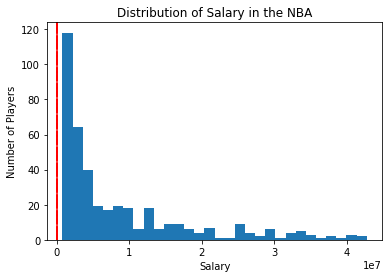

In [30]:
seed(47)
_ = plt.hist(df_final['Avg. Salary'], bins=30)
_ = plt.xlabel('Salary')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Salary in the NBA')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

This graph shows the overall distribution of NBA Players salary. Majority of the players salary are under \\$10,000,000 average salary

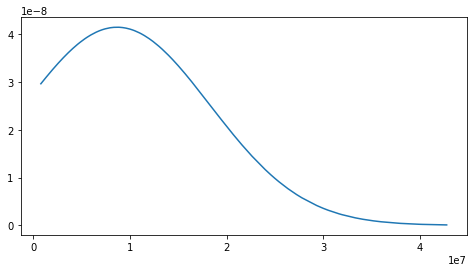

In [12]:
#Probability Density Function (PDF) Chart
x = df_final['Avg. Salary']

plt.figure(figsize=(8, 4))
plt.plot(x, st.norm.pdf(x, x.mean(), x.std()))
plt.show()

Probability density function(PDF) is used to determine the probability distribution for a Continuous Random Variable. Our variable is Average Salary (Avg. Salary). The area under the curve indicates the interval in which the Avg. Salary will fall.

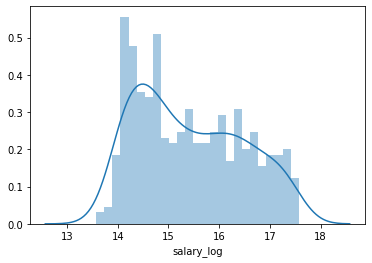

In [13]:
#Creating a column with the salary log to normalize the distribution
df_final['salary_log'] = np.log1p(df_final['Avg. Salary'])
sns.distplot(df_final['salary_log'], bins=25)

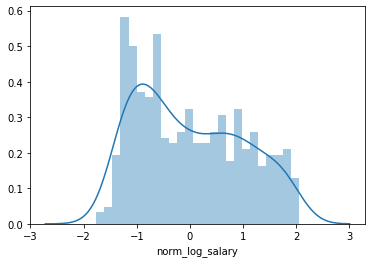

In [14]:
#Dividing by the mean and standard deviation to standardize the series in a new column
df_final['norm_log_salary'] = ((df_final['salary_log'] - df_final['salary_log'].mean()) / df_final['salary_log'].std())
sns.distplot(df_final['norm_log_salary'], bins=25)

### Mean and Standard Deviation

In [15]:
print(f"""Mean: {df_final.norm_log_salary.mean():.4f}
Standard Deviation: {df_final.norm_log_salary.std():.4f}""")

Mean: -0.0000
Standard Deviation: 1.0000


### P Value

In [16]:
norm_mean = df_final.norm_log_salary.mean()
norm_std = df_final.norm_log_salary.std()

p_value = st.norm(norm_mean, norm_std).sf(2*norm_std) * 2 #to sides
p_value

0.04550026389635674

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis. we reject the null hypothesis.

### Calculating z score

In [17]:
z_score_inf = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[0]
z_score_sup = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[1]

print(f'{z_score_inf:.4f} <--------> {z_score_sup:.4f}')

-1.9600 <--------> 1.9600


A z-score (also called a standard score) gives you an idea of how far from the mean a data point is.

### Lower Than Average Salary

In [18]:
#Players
df_final_lower = df_final[df_final['norm_log_salary'] < z_score_inf]
df_final_lower

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,STL,BLK,TOV,PF,PTS,PER,Team_y,GS,salary_log,norm_log_salary


In [19]:
print(f"""Players with a lower salary than the average: 
Total - {df_final_lower.shape[0]}
Rate - {df_final_lower.shape[0] / df_final.shape[0] * 100:.2f}%""")

Players with a lower salary than the average: 
Total - 0
Rate - 0.00%


### Higher Than Average Salary

In [20]:
#Players
df_final_higher = df_final[df_final['norm_log_salary'] > z_score_sup]
df_final_higher

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,STL,BLK,TOV,PF,PTS,PER,Team_y,GS,salary_log,norm_log_salary
9,James Harden,SG,HOU,30.0,4.0,171131520.0,171131520.0,100.00,42782880.0,2023.0,...,1.700000,0.900000,4.500000,3.400000,34.400000,28.4,HOU,61.0,17.571649,2.047654
10,John Wall,PG,WAS,29.0,4.0,171131520.0,171131520.0,100.00,42782880.0,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.571649,2.047654
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070.0,206794070.0,100.00,41358814.0,2023.0,...,1.945205,0.452055,4.452055,3.356164,22.945205,21.1,NaN,NaN,17.537796,2.015385
13,Kevin Durant,SF,BKNSigned w/GSW,31.0,4.0,164255700.0,159955700.0,97.38,41063925.0,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.530641,2.008564
1,Stephen Curry,PG,GSW,32.0,5.0,201158790.0,201158790.0,100.00,40231758.0,2022.0,...,1.568627,0.156863,3.000000,2.235294,26.392157,28.2,NaN,NaN,17.510167,1.989048
14,Chris Paul,PG,OKCSigned w/HOU,35.0,4.0,159730592.0,159730592.0,100.00,39932648.0,2022.0,...,1.965517,0.310345,2.620690,2.517241,15.620690,19.7,NaN,NaN,17.502705,1.981935


Curry is the only player with higher than average salary and is in the top 10 in PER.
None of these players are top ten in scoring.

In [21]:
print(f"""Players with a higher salary than the average: 
Total - {df_final_higher.shape[0]}
Rate - {df_final_higher.shape[0] / df_final.shape[0] * 100:.2f}%""")

Players with a higher salary than the average: 
Total - 6
Rate - 1.48%


In [22]:
#p-value and alpha max to the highest salary
p_value = st.norm(norm_mean, norm_std).sf(df_final['norm_log_salary'].max())
alpha = 1 - p_value
print(f'P-value: {p_value:.3f}\nAlpha Max: {alpha:.3f}\nWe can confirm that the highest salary is on the distribution!')

P-value: 0.020
Alpha Max: 0.980
We can confirm that the highest salary is on the distribution!


In [23]:
np.mean(df_final['Avg. Salary'])

8672969.575308641

data1: mean=8672969.575 stdv=9610307.369
data2: mean=25.975 stdv=4.413


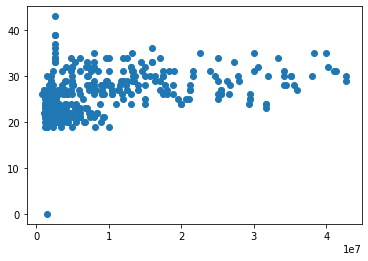

In [24]:
# Showing the correlation of Avg. Salary and Age
data1 = df_final['Avg. Salary']
data2 = df_final['Age_x']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
# plot
plt.scatter(data1, data2)
plt.show()

In [25]:
#cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
np.cov(data1, data2)

array([[9.25866167e+13, 1.72702812e+07],
       [1.72702812e+07, 1.95241413e+01]])

In [26]:
corr, _ = st.pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.406


Pearsons shows a moderate correlation

In [27]:
corr, _ = st.spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.500


Spearmans shows a moderate correlation as well